In [1]:
import numpy as np
import torch
from torch import nn
from torch import optim
from torch.autograd import Variable
from __future__ import print_function


import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
torch 

<module 'torch' from '/Users/yennanliu/anaconda3/envs/pytorch_/lib/python3.5/site-packages/torch/__init__.py'>

## 0) Get data

In [3]:
#from sklearn.datasets import load_boston
from sklearn.datasets import make_classification

def get_classification_data():
    raw_dara = make_classification(n_samples=300)
    #print (data.shape)
    x= raw_dara[0]
    y= raw_dara[1]
    # add some noise 
    # reshape noise to form : (300,1)
    #x = x+np.random.normal(0,0.5,300).reshape((300, 1))
    return x, y

from sklearn import decomposition
# reduce dimension from N -> 2 
def data_preprocess(x,y):
    pca = decomposition.PCA(n_components=2)
    pca.fit(x)
    x_ = pca.transform(x)
    return x_, y 
    

In [4]:
x,y = make_classification()

In [5]:
x_data,y_data = data_preprocess(x,y)

Text(0,0.5,'y')

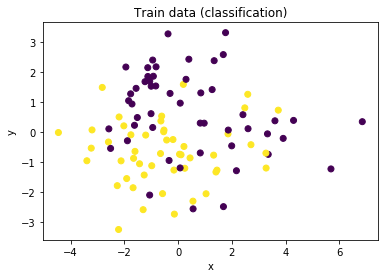

In [6]:
y_=y_data.copy()
# fix y shape from (100,) -> (100,1)
y_.shape=(100,1)
plt.scatter(x_data[:,:1],x_data[:,1:2],c = y_)
plt.title('Train data (classification)')
plt.xlabel('x')
plt.ylabel('y')

## 1) Classification (logistics regression)

In [7]:
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.lr = nn.Linear(2,1)
        self.sm = nn.Sigmoid()
    def forward(self,x):
        x = self.lr(x)
        x = self.sm(x)
        return x 
    

In [8]:
logistic_model = LogisticRegression()

In [9]:
print (logistic_model)

LogisticRegression(
  (lr): Linear(in_features=2, out_features=1)
  (sm): Sigmoid()
)


In [10]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(logistic_model.parameters(),
                            lr=.001,
                            momentum=.9)

In [11]:
# train the model 

for epoch in range(5000):
    
    # --------------------
    x__ = torch.from_numpy(x_data)
    x__ = x__.float()
    y__ = torch.from_numpy(y_data)
    y__ = y__.float()
    # --------------------
    
    x = Variable(x__)
    y = Variable(y__)
    
    # forward 
    
    out = logistic_model(x)
    loss = criterion(out, y )
    print_loss = loss.data[0]
    mask = out.ge(0.5).float()
    correct = (mask==y).sum()
    acc = correct.data[0]/x.size(0)
    
    # backward 
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # 
    if (epoch+1) % 1000 ==0:
        print ('*'*10)
        print ('epoch {}'.format(print_loss))
        print ('loss is {:.4f}'.format(print_loss))
        print ('acc is {:.4f}'.format(acc))
    
    


/Users/yennanliu/anaconda3/envs/pytorch_/lib/python3.5/site-packages/torch/nn/functional.py:1168: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


**********
epoch 0.5336318016052246
loss is 0.5336
acc is 1.3600
**********
epoch 0.5327388644218445
loss is 0.5327
acc is 1.3400
**********
epoch 0.5327263474464417
loss is 0.5327
acc is 1.3400
**********
epoch 0.5327260494232178
loss is 0.5327
acc is 1.3400
**********
epoch 0.5327261090278625
loss is 0.5327
acc is 1.3400
